<a href="https://colab.research.google.com/github/kenny08gt/lab3_algoritmos_ds/blob/master/lab3_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alan Hurtarte
## 19000590

---

## Laboratorio 3

---

(100, 1)
(1000, 1)
[2.14834777]


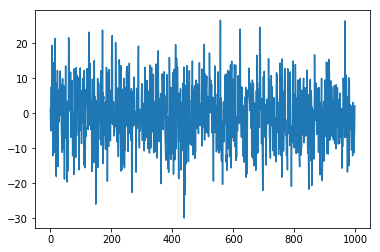

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)
d = 100 #cantidad de columnas para el dataset.
n = 1000 #cantidad de observaciones para el dataset.
X = np.random.normal(0,1, size=(n,d))
beta_true = np.random.normal(0,1, size=(d,1))
y = X.dot(beta_true) + np.random.normal(0,0.5,size=(n,1))
print(beta_true.shape)
print(y.shape)
print(y[-1])
plt.plot(y)

## Parte 1

In [14]:
beta_star = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose()), y)
y_hat = np.dot(X, beta_star)
error = (1/(2*len(y))) * np.sum(np.power(y_hat - y, 2))
print(error)

0.11332805666912248


### Conclusión
No se utiliza este método por la falta de optimización al encontrar una solución.


## Parte 2

4.515814298141834
0.11334335997414492
0.1133281060434431


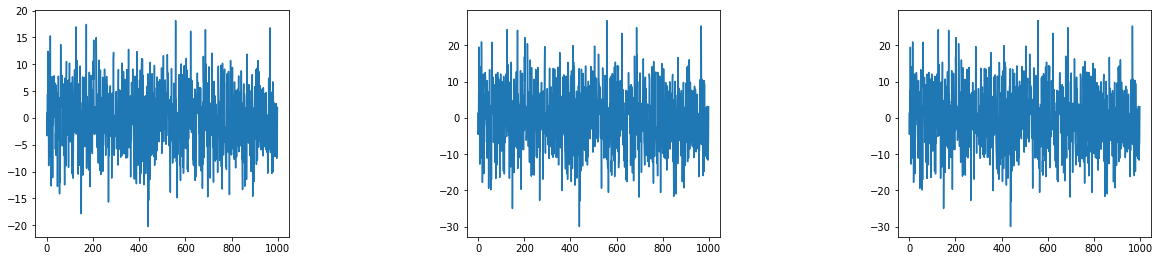

In [3]:
def gradientDescent(x, y, beta, learning_rate, iterations):
    
    m = len(y)
    i = 0
    cost_h = []
    while i < iterations:
      y_hat = np.dot(x, beta)
      beta = beta - learning_rate*(np.dot(x.transpose(), (y_hat - y)))
      cost = (1/(2*m))*np.sum(np.square(y_hat - y))
      cost_h.append(cost)
      i += 1
      
    return beta, cost, y_hat, cost_h
  

beta = np.zeros((d,1))
beta_1, cost_h, y_hat1, cost_h1 = gradientDescent(X, y, beta, 0.00005, 20)
print(cost_h)

beta = np.zeros((d,1))
beta_2, cost_h, y_hat2, cost_h2 = gradientDescent(X, y, beta, 0.0005, 20)
print(cost_h)

beta = np.zeros((d,1))
beta_3, cost_h, y_hat3, cost_h3 = gradientDescent(X, y, beta, 0.0007, 20)
print(cost_h)

y_hats = np.array((y_hat1, y_hat2, y_hat3))

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

for i in range(1, 4):
    plt.subplot(2, 3, i)
#     plt.ylim([, 5])
    plt.plot(range(0, len(y_hats[i -1])), y_hats[i - 1])

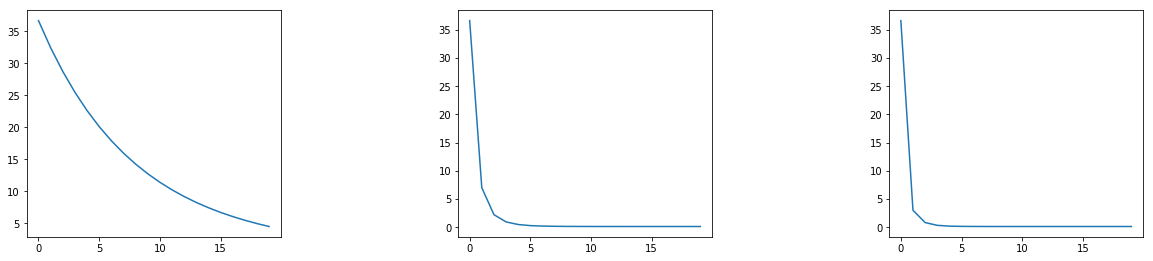

In [4]:
costs = np.array((cost_h1, cost_h2, cost_h3))

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.plot(range(0, len(costs[i -1])), costs[i - 1])

### Conclusión
El mejor step size es el mas grande (0.0007) logrante un error menor que los demas.

Se probo con un step size grande en este caso convergio mas rapido como se puede ver en las graficas.

Los step size tienen gran impacto en el resultado, se ve como mientras mas aumenta menor error obtenemos


## Parte 3

4.324834785256679
3.8136626107325835
14.465852090236618


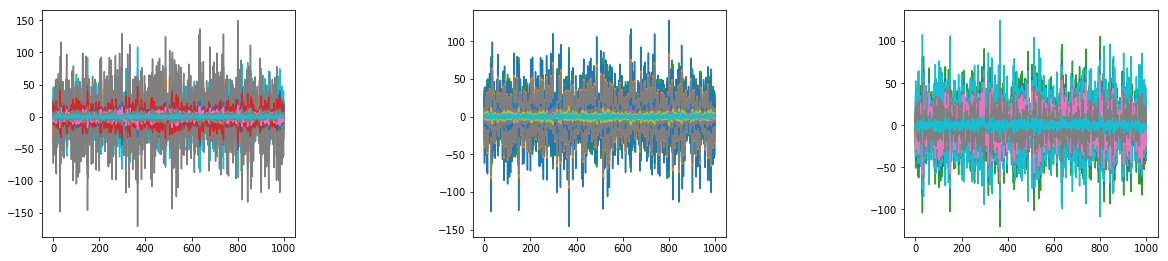

In [5]:
def stocasticGradientDescent(X, y, beta, learning_rate, iterations):
  i = 0
  cost_h = []
  m = len(y)
  indices = np.array(range(len(X)))
  for i in range(iterations):
    np.random.shuffle(indices)
    for j in range(len(X)):
      x = X[indices[j]]
      y_hat = np.dot(x, beta)
      beta = beta - learning_rate*(y_hat - y[indices[j]])*  x.T
      cost = (1/(2*m))*np.sum(np.square(y_hat - y[indices[j]]))
        
    cost_h.append(cost)
  
  return beta, cost, (np.dot(X, beta)), cost_h

beta = np.zeros((d,1))
beta_1, cost_h, y_hat1, cost_h1 = stocasticGradientDescent(X, y, beta, 0.0005, 1000)
print(cost_h)

beta = np.zeros((d,1))
beta_2, cost_h, y_hat2, cost_h2 = stocasticGradientDescent(X, y, beta, 0.005, 1000)
print(cost_h)

beta = np.zeros((d,1))
beta_3, cost_h, y_hat3, cost_h3 = stocasticGradientDescent(X, y, beta, 0.01, 1000)
print(cost_h)

y_hats = np.array((y_hat1, y_hat2, y_hat3))

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.plot(range(0, len(y_hats[i -1])), y_hats[i - 1])

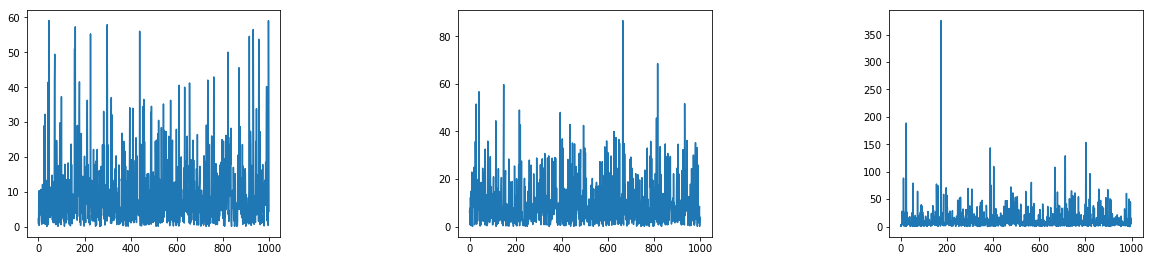

In [6]:
costs = np.array((cost_h1, cost_h2, cost_h3))

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.plot(range(0, len(costs[i -1])), costs[i - 1])

### Conclusión
EL step size afecta igual que en los otros metodos, depende mucho de como converge el método de este numero.

El que parece dar el mejor resultado es el 0.005, parece ser que el 0.01 es demasiado grande y el método no converge

## Parte 4

0.8582492501780558 0.28151727076575855
1.7705997629833754
3.5895945682585744


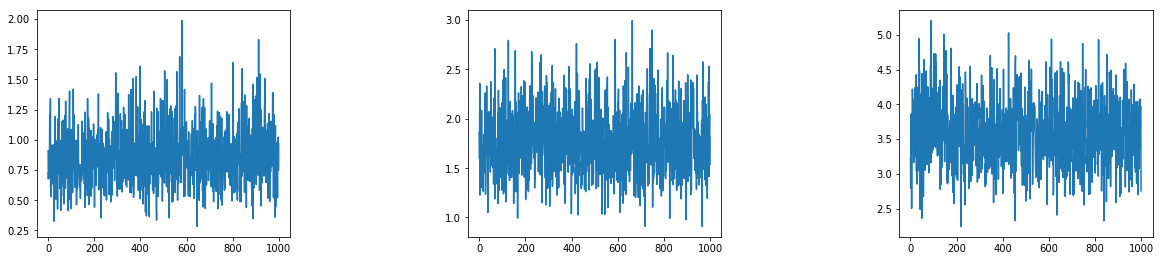

In [20]:
def BatchGradientDescent(X, y, beta, learning_rate, iterations, batch_size):
  i = 0
  cost_h = []
  m = len(y)
  indices = np.array(range(len(X)))
  for i in range(iterations):
    np.random.shuffle(indices)
    cost_h2 = []
    for j in range(len(X)):
      x = X[indices[0:batch_size]]
      y_hat = np.dot(x, beta)
      beta = beta - learning_rate*(1/(batch_size))*np.sum(np.dot(x.T, (y_hat - y[indices[0:batch_size]])))
      cost = (1/(2*m))*np.sum(np.square(y_hat - y[indices[0:batch_size]]))
      cost_h2.append(cost)
    cost_h.append(np.mean(cost_h2))
  
  return beta, np.mean(cost_h), (np.dot(X, beta)), cost_h

beta = np.zeros((d,1))
beta_1, cost_h, y_hat1, cost_h1 = BatchGradientDescent(X, y, beta, 0.0005, 1000, 25)
print(cost_h, np.min(cost_h1))

beta = np.zeros((d,1))
beta_2, cost_h, y_hat2, cost_h2 = BatchGradientDescent(X, y, beta, 0.0005, 1000, 50)
print(cost_h)

beta = np.zeros((d,1))
beta_3, cost_h, y_hat3, cost_h3 = BatchGradientDescent(X, y, beta, 0.0005, 1000, 100)
print(cost_h)

costs = np.array((cost_h1, cost_h2, cost_h3))

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.plot(range(0, len(costs[i -1])), costs[i - 1])

0.8604223456241823
1.7648242654342199
3.557701318881701


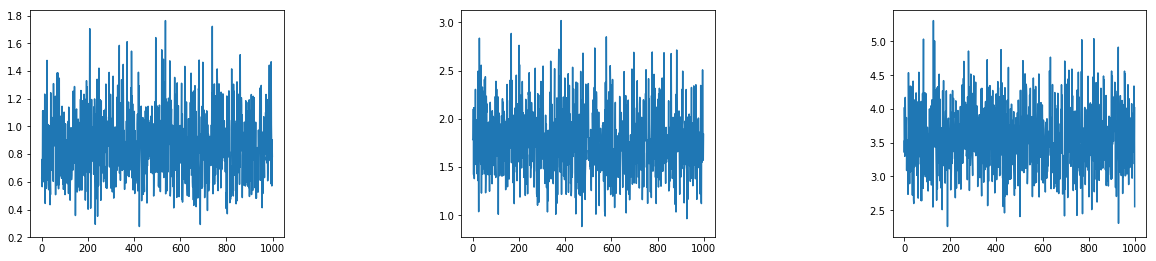

In [21]:
beta = np.zeros((d,1))
beta_1, cost_h, y_hat1, cost_h1 = BatchGradientDescent(X, y, beta, 0.005, 1000, 25)
print(cost_h)

beta = np.zeros((d,1))
beta_2, cost_h, y_hat2, cost_h2 = BatchGradientDescent(X, y, beta, 0.005, 1000, 50)
print(cost_h)

beta = np.zeros((d,1))
beta_3, cost_h, y_hat3, cost_h3 = BatchGradientDescent(X, y, beta, 0.005, 1000, 100)
print(cost_h)

costs = np.array((cost_h1, cost_h2, cost_h3))

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.plot(range(0, len(costs[i -1])), costs[i - 1])

2.0110958469151087e+92
1.7645692694019655
3.5466404476366975


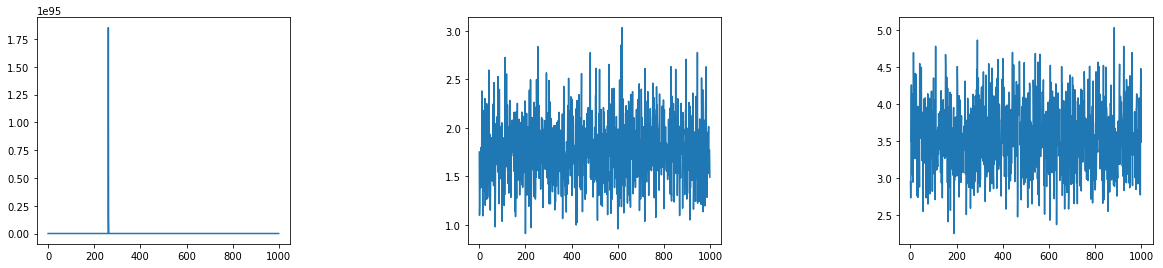

In [22]:
beta = np.zeros((d,1))
beta_1, cost_h, y_hat1, cost_h1 = BatchGradientDescent(X, y, beta, 0.01, 1000, 25)
print(cost_h)

beta = np.zeros((d,1))
beta_2, cost_h, y_hat2, cost_h2 = BatchGradientDescent(X, y, beta, 0.01, 1000, 50)
print(cost_h)

beta = np.zeros((d,1))
beta_3, cost_h, y_hat3, cost_h3 = BatchGradientDescent(X, y, beta, 0.01, 1000, 100)
print(cost_h)

costs = np.array((cost_h1, cost_h2, cost_h3))

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.plot(range(0, len(costs[i -1])), costs[i - 1])

0.32787780175792997


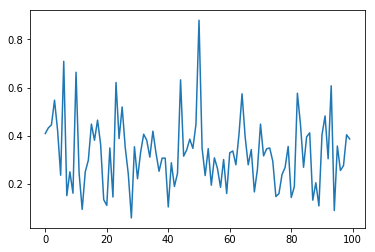

In [23]:
beta = np.zeros((d,1))
beta_1, cost_h, y_hat1, cost_h1 = BatchGradientDescent(X, y, beta, 0.0007, 100, 10)
print(cost_h)
plt.plot(range(0, len(cost_h1)), cost_h1)

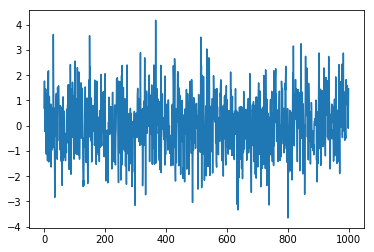

In [24]:
plt.plot(range(0, len(y_hat1)), y_hat1)

### Conclusión
El mejor resultado lo dio el step size 0.0007 con gradient descent.

Con minibatch de 25 parece tener una mejor convergencia en los tres diferentes step size.

Siguiendo esa hipotesis la prueba con un batch size menor se logro un menor error.

## Parte 5

| Método| Learning rate | Iteraciones | Error |
|---|---|---|---|
|GD |0.0007 | 20 | 0.11 |
|GD | 0.0005 | 20 | 0.11 |
|Solución cerrada | NA | NA | 0.11 |
|MBGD (10) | 0.0007 | 100 | 0.18 |
|MBGD (25) | 0.01 | 1000 | 0.71 |
|MBGD (25) | 0.005 | 1000 | 0.87|
|MBGD (25)|0.0005 | 1000| 1.19| 
|MBGD (50) | 0.01 | 1000 | 2.36 |
|MBGD (50) | 0.005 | 1000 | 2.17 |
|MBGD (50) | 0.0005 | 1000 | 2.11 |
|MBGD (100) | 0.0005 | 1000 | 3.29 |
|MBGD (100) | 0.01 | 1000 | 3.76 |
|SGD | 0.005 | 1000 | 3.81 |
|MBGD (100) | 0.005 | 1000 | 4.02 |
|SGD | 0.0005 | 1000 | 4.32 |
|GD | 0.00005 | 20 | 4.52 |
|SGD | 0.01 | 1000 | 14.47 |




